<a href="https://colab.research.google.com/github/anshudhanshu/IPL-Dataset-Analysis/blob/main/Sudhanshu_Rawat_Team_3_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

### Objective:-
* To find total number of teams in IPL
* To find the team that won maximum number of matches
* To find the most successfull player in IPL
* To find the city that hosted most IPL matches
* To find the venue where most of the IPL matches were hosted
* To find the most successfull team in IPL matches
* To determine if toss decision may affect the winning chance
* To find the biggest defeat in IPL 
* To find the biggest victory in IPL
* To find the teams That played most number of times against eachother 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Dat/'
file_name = 'Copy of matches.csv'
ipl_matches = pd.read_csv(file_path+file_name)

In [4]:
ipl_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
ipl_matches.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [6]:
ipl_matches.shape

(756, 18)

**There are 756 rows that means total 756 IPL matches held.**

In [7]:
ipl_matches.Season.unique().tolist()

['IPL-2017',
 'IPL-2008',
 'IPL-2009',
 'IPL-2010',
 'IPL-2011',
 'IPL-2012',
 'IPL-2013',
 'IPL-2014',
 'IPL-2015',
 'IPL-2016',
 'IPL-2018',
 'IPL-2019']

In [8]:
len(ipl_matches.Season.unique().tolist())

12

**There are total 12 Season of IPL matches in this dataset from 2008 to 2019**

In [9]:
list(ipl_matches.columns)

['id',
 'Season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [10]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
print(ipl_matches.team1.unique().tolist())
len(ipl_matches.team1.unique().tolist())

['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']


15

**There are total 15 teams playing in IPL matches**

In [12]:
ipl_matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


### Observations
* The biggest victory, when team choosen for batting first, was from margin of 146 run and when team decided to field first, was from 10 wickets
* 75% of team that decided to bat first won by margin of 19 run.
* 75% of teams that decided to field first won by 6 wickets.
* 25% of teams whether they decided to bat first or field first got either tie result or no result.

In [13]:
ipl_matches.describe(include='object')

,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2,umpire3
count,756,749,756,756,756,756,756,756,752,752,756,754,754,119
unique,12,32,546,15,15,15,2,3,15,226,41,61,65,25
top,IPL-2013,Mumbai,20-05-2018,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,Mumbai Indians,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,C Shamshuddin
freq,76,101,2,101,95,98,463,743,109,21,77,73,57,10


### Observations
* There are total 12 IPL season from 2008 to 2019 and the most number of IPL matches were played in `IPL-2013` season.
* Mumbai city hosted the maximum number of IPL matches.
* The most frequent `toss_winner` team was Mumbai Indians
* Most of the teams that won the toss decided to field first
* Mumbai Indians won the IPL matches maximum number of times
* The player who got `player_of_match` maximum number of times was CH Gayle.
* Eden Gardens stadium hosted maximum number of IPL matches from 2008 to 2019


### Dealing with NaN values

In [14]:
ipl_matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

If we observe the output we can see that the feature umpire3 has significant number of NaN values 

In [15]:
ipl_matches['umpire3'].to_numpy().reshape(1,-1)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan

It won't be good idea to impute these NaN values so we can drop the column umpire3

In [16]:
ipl_matches.drop('umpire3',axis=1, inplace = True)

In [17]:
ipl_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


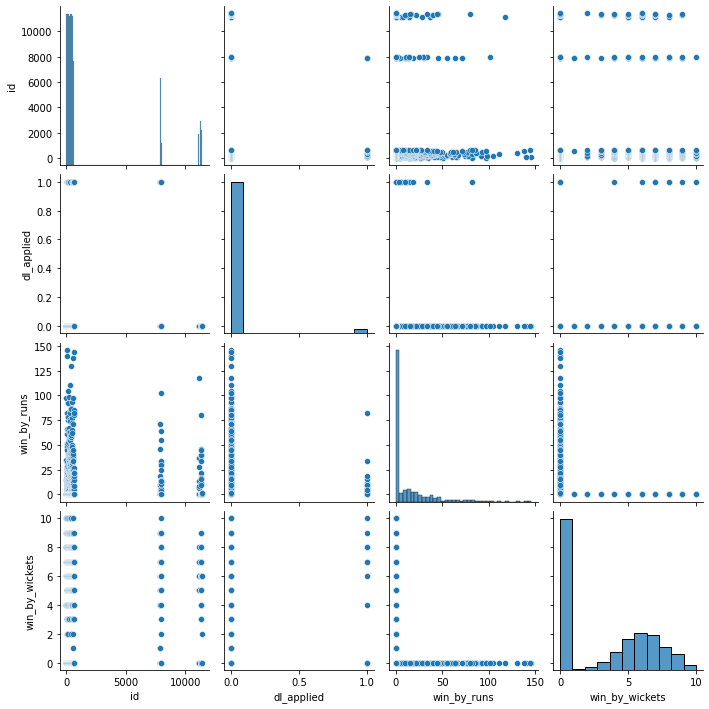

In [18]:
sns.pairplot(ipl_matches)

## Teams with maximum victories in each season of IPL

In [20]:
wins_per_season = ipl_matches[['Season','winner']].groupby('Season')
wins_per_season=pd.DataFrame(wins_per_season['winner'].value_counts())
wins_per_season.rename(columns = {'winner':'count_of_winner'},inplace = True)
wins_per_season = wins_per_season.reset_index()
wins_per_season

,Season,winner,count_of_winner
0,IPL-2008,Rajasthan Royals,13
1,IPL-2008,Kings XI Punjab,10
2,IPL-2008,Chennai Super Kings,9
3,IPL-2008,Delhi Daredevils,7
4,IPL-2008,Mumbai Indians,7
...,...,...,...
95,IPL-2019,Kings XI Punjab,6
96,IPL-2019,Kolkata Knight Riders,6
97,IPL-2019,Sunrisers Hyderabad,6
98,IPL-2019,Rajasthan Royals,5


will do it later

### City that hosted most number of IPL matches

In [21]:
city_counts = ipl_matches['city'].value_counts().reset_index()

In [22]:
city_counts.rename(columns={'index':'city','city':'no_of_matches'}, inplace = True)
city_counts

,city,no_of_matches
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


Now let us visualize them using bar plot

Text(0.5, 1.0, 'IPL Cities')

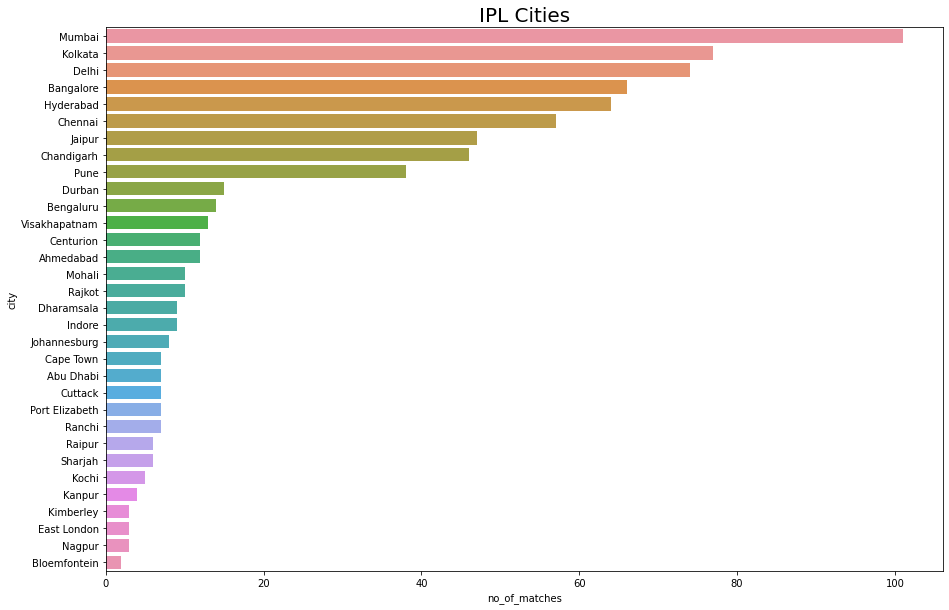

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x='no_of_matches', y='city', data=city_counts)
plt.title('IPL Cities',fontdict={'fontsize':20})

### Observations
* Mumbai, Kolkata, Delhi, Bangaluru and Hyderabad are top 5 cities that hosted IPL matches.
* Mumbai hosted maximum number of IPL matches 
* There are 32 cities till 2019 that hosted IPL matches

### The venue where most of the IPL matches were hosted

In [24]:
venue_counts = ipl_matches['venue'].value_counts().reset_index()
venue_counts.rename(columns={'index':'venue','venue':'no_of_matches'}, inplace = True)
venue_counts

,venue,no_of_matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


Text(0.5, 1.0, 'IPL Venue')

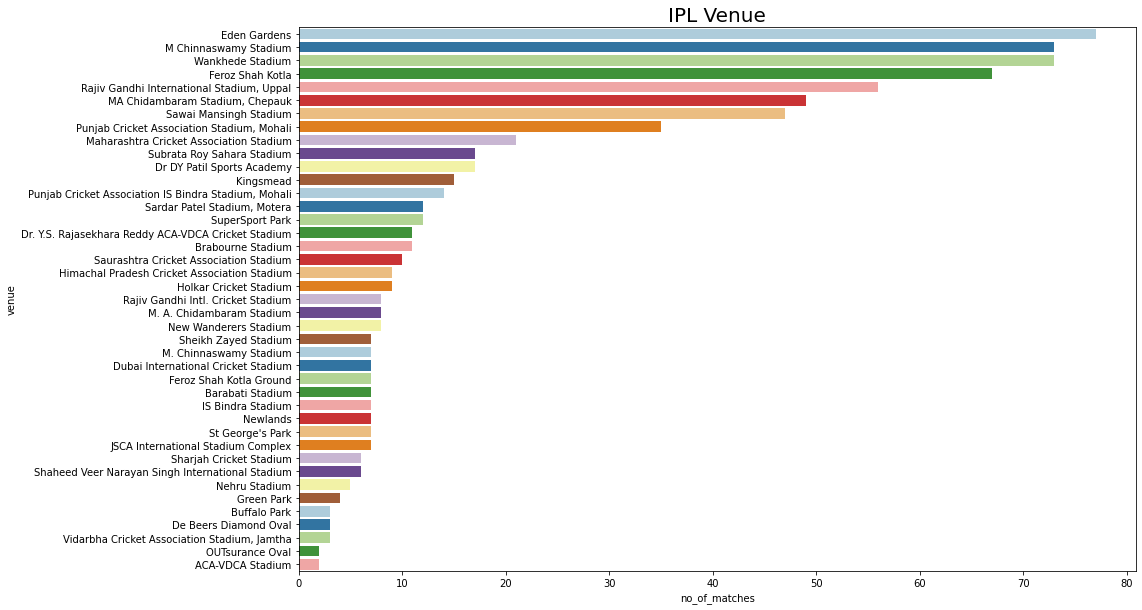

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x='no_of_matches', y='venue', data=venue_counts,palette='Paired')
plt.title('IPL Venue',fontdict={'fontsize':20})

Text(0.5, 1.0, 'IPL Venue')

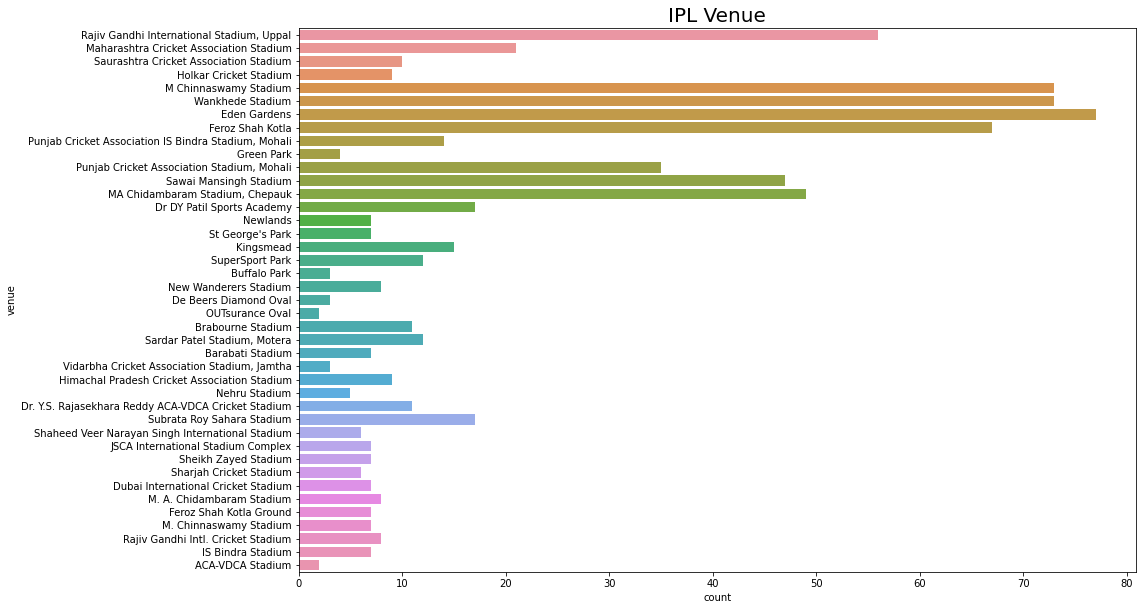

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(y=ipl_matches.venue)
plt.title('IPL Venue',fontdict={'fontsize':20})

### Observations
* Eden Gardens stadium, Wankhede Stadium, M Chinnaswamy Stadium, Feroz Shah Kotla stadium and Rajiv Gandhi International Stadium, Uppal are top 5 venues that hosted IPL matches.
* Eden Gardens stadium hosted maximum number of IPL matches.
* There are 41 venues till 2019 that hosted IPL matches


### The most successfull team in IPL

In [27]:
successfull_team = ipl_matches['winner'].value_counts().reset_index()
successfull_team.rename(columns = {'index':'team_name','winner':'win_count'},inplace = True)
successfull_team

,team_name,win_count
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


Text(0.5, 1.0, 'Winning Teams')

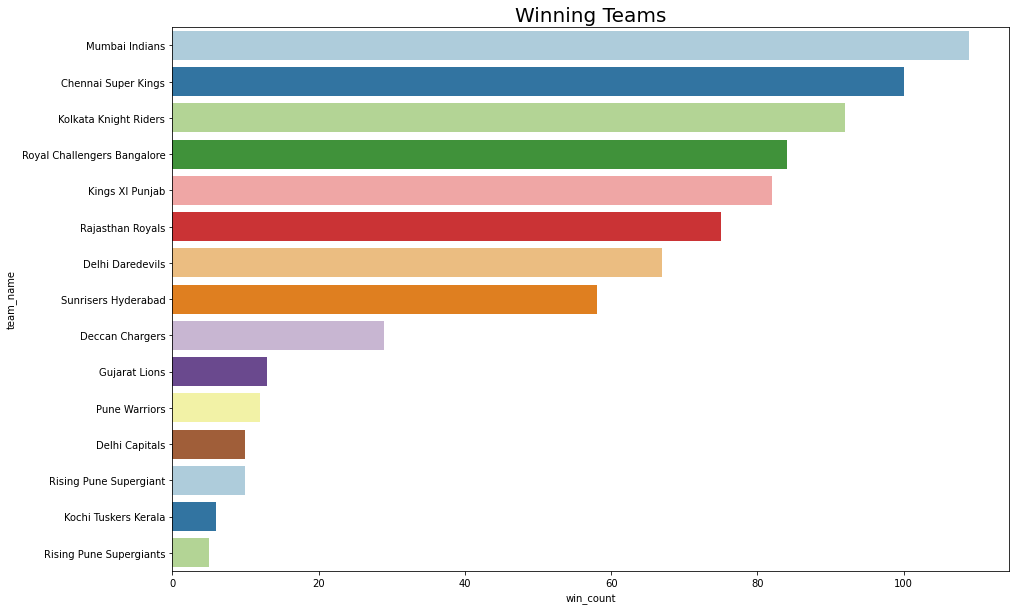

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='win_count', y='team_name', data=successfull_team,palette='Paired')
plt.title('Winning Teams',fontdict={'fontsize':20})

Text(0.5, 1.0, 'Winning Teams')

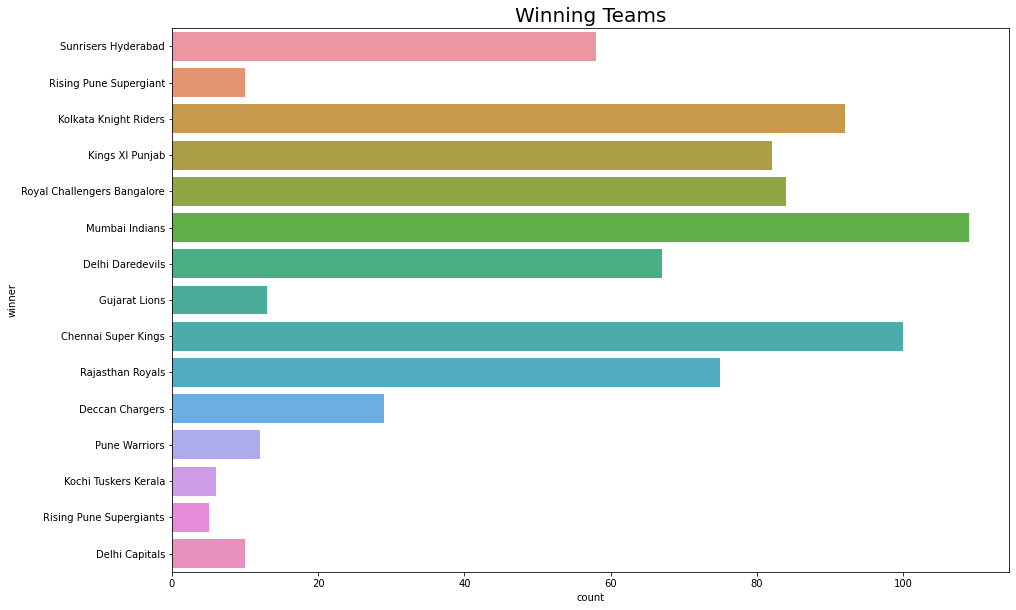

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(y=ipl_matches.winner)
plt.title('Winning Teams',fontdict={'fontsize':20})

### Observations
* Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders, Royal Challengers Bangalore and Kings XI Punjab were top 5 teams in IPL.
* Mumbai Indians was the most successfull team in IPL match

### The most successfull player in IPL

In [30]:
successfull_player = ipl_matches['player_of_match'].value_counts().reset_index()
successfull_player.rename(columns = {'index':'player_name','player_of_match':'wins'}, inplace = True)
successfull_player

,player_name,wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,RG Sharma,17
4,MS Dhoni,17
...,...,...
221,R Bhatia,1
222,AD Mascarenhas,1
223,Mohammed Shami,1
224,P Parameswaran,1


Text(0.5, 1.0, 'Top 10 Successfull Players')

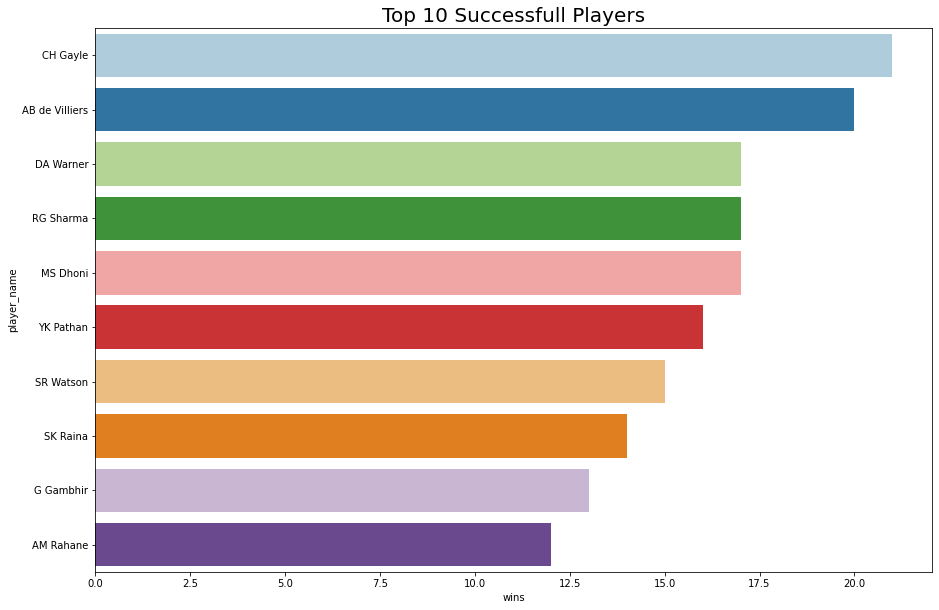

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x='wins', y='player_name', data=successfull_player.head(10),palette='Paired')
plt.title('Top 10 Successfull Players',fontdict={'fontsize':20})

# Exploring Players Dataset

In [32]:
player_df = pd.read_excel('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Dat/Copy of Players.xlsx')
player_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [33]:
player_df.shape

(566, 5)

**There were 566 players in IPL from 2008 to 2019**

In [34]:
player_df.isnull().sum()

Player_Name       0
DOB              95
Batting_Hand      3
Bowling_Skill    64
Country          95
dtype: int64

There are some null values in the dataset and it will not be possible to impute these null values so let us just drop them

In [35]:
player_df.dropna(inplace=True)

In [36]:
player_df.shape

(431, 5)

After dropping the null values we are left with 431 values in the dataset

In [37]:
player_df.Batting_Hand.unique()

array(['Right_Hand', 'Left_Hand'], dtype=object)

In [38]:
player_df['Batting_Hand'].replace({'Right_hand':'Right_Hand'},inplace= True)

## Batting Skill

In [39]:
player_df.Batting_Hand.unique()

array(['Right_Hand', 'Left_Hand'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Batting Hands of Batsman')

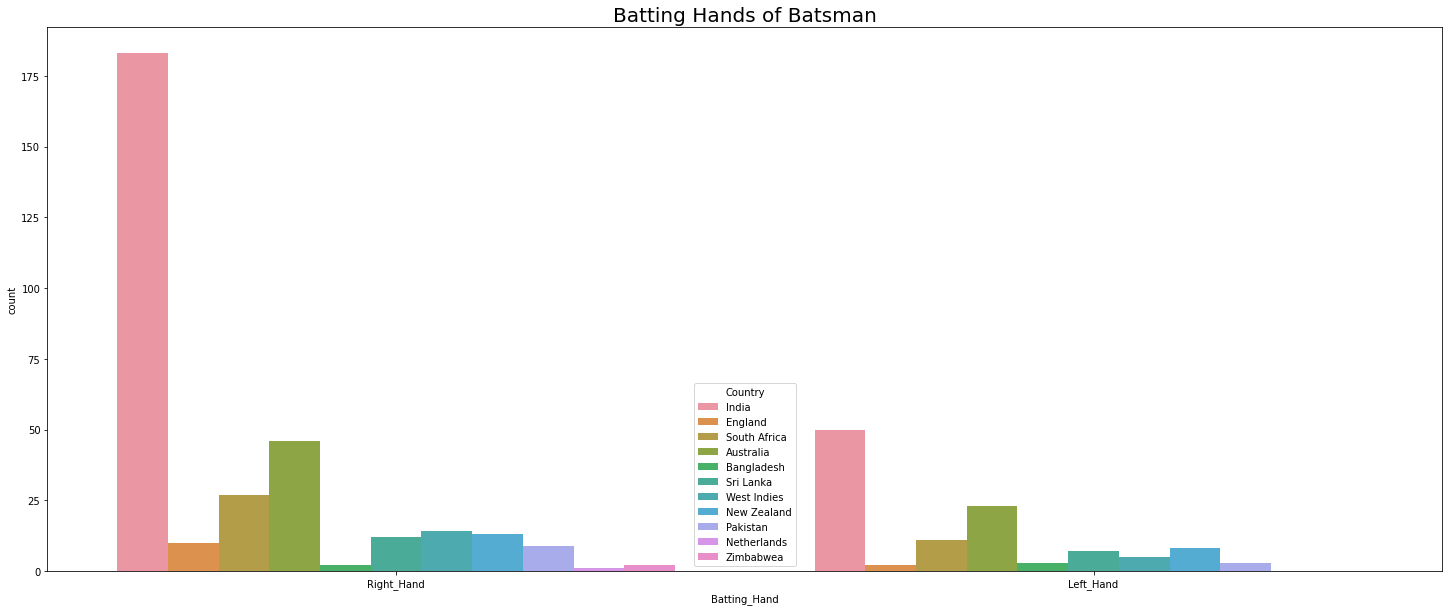

In [40]:
plt.figure(figsize=(25,10))
sns.countplot(player_df.Batting_Hand,hue = player_df.Country)
plt.title('Batting Hands of Batsman',fontdict={'fontsize':20})

### Observations
* We can see here almost every country has more number of Right handed batsman
* If we observe closly then we see that Netherlands and Zimbabwea has no left handed batsman

## Bowling Skill

In [41]:
player_df.Bowling_Skill.unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Right-arm fast-medium',
       'Legbreak googly', 'Legbreak', 'Left-arm medium-fast',
       'Right-arm medium-fast', 'Left-arm medium',
       'Slow left-arm orthodox', 'Right-arm fast', 'Left-arm fast-medium',
       'Left-arm fast', 'Slow left-arm chinaman', 'Right-arm bowler'],
      dtype=object)

Text(0.5, 1.0, 'Bowling Skills ')

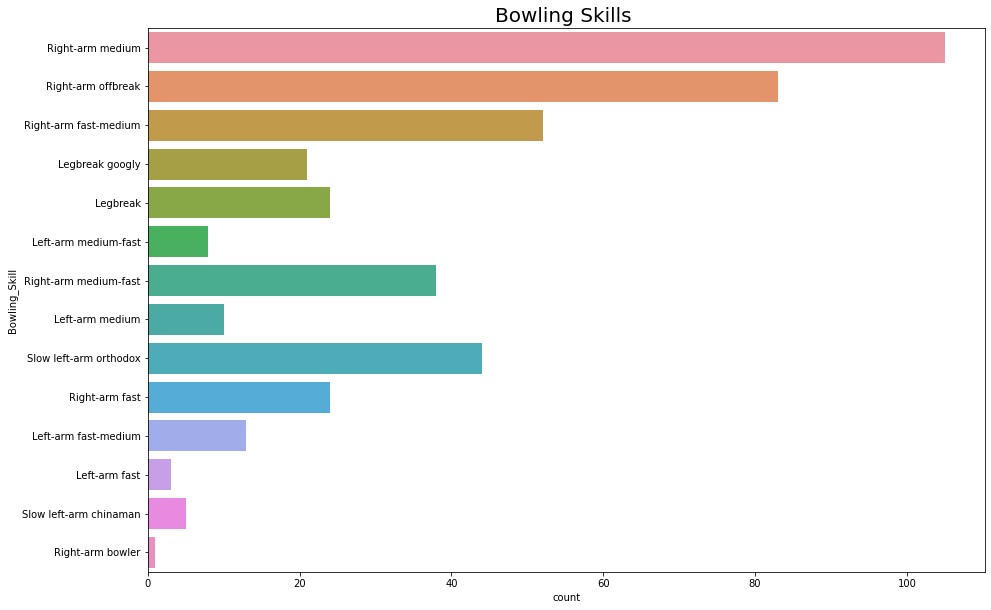

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(y=player_df.Bowling_Skill)
plt.title('Bowling Skills ',fontdict={'fontsize':20})

### Observation 
* There were more bowlers in the IPL who had Right-arm medium bowling skill
* There were very few bowlers in The IPL having Left-arm fast bowling skill

# Deliveries Dataset

In [43]:
deliveries_df  = pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Dat/Copy of deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


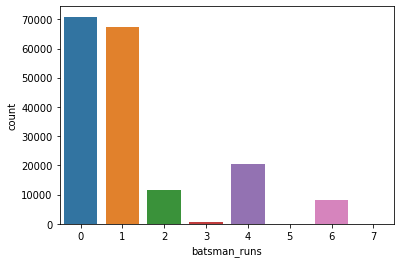

In [44]:
sns.countplot(deliveries_df.batsman_runs)

In [45]:
deliveries_df[['match_id','batting_team','batsman','batsman_runs']].groupby(['match_id','batting_team','batsman']).sum().reset_index()

,match_id,batting_team,batsman,batsman_runs
0,1,Royal Challengers Bangalore,A Choudhary,6
1,1,Royal Challengers Bangalore,CH Gayle,32
2,1,Royal Challengers Bangalore,KM Jadhav,31
3,1,Royal Challengers Bangalore,Mandeep Singh,24
4,1,Royal Challengers Bangalore,S Aravind,0
...,...,...,...,...
11289,11415,Mumbai Indians,KH Pandya,7
11290,11415,Mumbai Indians,MJ McClenaghan,0
11291,11415,Mumbai Indians,Q de Kock,30
11292,11415,Mumbai Indians,RD Chahar,0


In [46]:
deliveries_df.rename(columns = {'match_id':'id'},inplace =True)


In [47]:
deliveries_df

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [49]:
deliveries_df.isnull().sum()

id                       0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [51]:
deliveries_df[deliveries_df['is_super_over'] == 1]

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,4,0,4,NaN,NaN,NaN
8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,6,0,6,NaN,NaN,NaN
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,0,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127365,536,3,Kings XI Punjab,Rajasthan Royals,1,7,SE Marsh,GJ Maxwell,CH Morris,1,0,0,1,0,0,0,1,1,SE Marsh,run out,NaN
127366,536,4,Rajasthan Royals,Kings XI Punjab,1,1,SR Watson,JP Faulkner,MG Johnson,1,0,0,0,0,0,0,0,0,SR Watson,bowled,NaN
127367,536,4,Rajasthan Royals,Kings XI Punjab,1,2,SPD Smith,JP Faulkner,MG Johnson,1,0,0,0,1,0,4,1,5,NaN,NaN,NaN
127368,536,4,Rajasthan Royals,Kings XI Punjab,1,3,SPD Smith,JP Faulkner,MG Johnson,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [52]:
deliveries_without_superover = deliveries_df[deliveries_df['is_super_over']==0]

In [53]:
deliveries_df[['bowler','wide_runs']].groupby('bowler').sum().sort_values('wide_runs',ascending=False)

,wide_runs
bowler,
SL Malinga,152
P Kumar,144
DJ Bravo,124
R Ashwin,111
UT Yadav,110
...,...
RR Bhatkal,0
RJ Peterson,0
GR Napier,0


In [54]:
deliveries_df.inning.unique()

array([1, 2, 3, 4, 5])

In [55]:
deliveries_without_superover[['batting_team','batsman','batsman_runs']].groupby(['batting_team','batsman']).sum().reset_index().sort_values(by = 'batsman_runs',ascending=False)

,batting_team,batsman,batsman_runs
866,Royal Challengers Bangalore,V Kohli,5429
50,Chennai Super Kings,SK Raina,4566
36,Chennai Super Kings,MS Dhoni,3903
553,Mumbai Indians,RG Sharma,3744
764,Royal Challengers Bangalore,AB de Villiers,3744
...,...,...,...
417,Kolkata Knight Riders,J Denly,0
903,Sunrisers Hyderabad,K Ahmed,0
747,Rising Pune Supergiants,M Ashwin,0
659,Rajasthan Royals,JDP Oram,0


In [56]:
deliveries_df[['batting_team','batsman','total_runs']].groupby(['batting_team','batsman']).sum().reset_index().sort_values(by = 'total_runs',ascending=False)

,batting_team,batsman,total_runs
866,Royal Challengers Bangalore,V Kohli,5616
50,Chennai Super Kings,SK Raina,4779
36,Chennai Super Kings,MS Dhoni,4081
764,Royal Challengers Bangalore,AB de Villiers,3895
553,Mumbai Indians,RG Sharma,3837
...,...,...,...
131,Delhi Capitals,S Lamichhane,0
138,Delhi Daredevils,AB Dinda,0
256,Gujarat Lions,S Kaushik,0
251,Gujarat Lions,MM Patel,0


In [57]:
strik_rate_df = pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Dat/Copy of most_runs_average_strikerate.csv')
strik_rate_df

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


In [58]:
strik_rate_df.corr()

,total_runs,out,numberofballs,average,strikerate
total_runs,1.000000,0.972650,0.995744,0.556467,0.308024
out,0.972650,1.000000,0.977280,0.506673,0.316884
numberofballs,0.995744,0.977280,1.000000,0.550079,0.292358
average,0.556467,0.506673,0.550079,1.000000,0.626234
strikerate,0.308024,0.316884,0.292358,0.626234,1.000000


In [59]:
team_home_df = pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Dat/Copy of teamwise_home_and_away.csv')
team_home_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [60]:
team_home_df['total_win_percentage'] = 100*(team_home_df['home_wins'] + team_home_df['away_wins'])/(team_home_df['home_matches'] + team_home_df['away_matches'])

In [61]:
team_home_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,total_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326,58.288770
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333,60.975610
3,Delhi Capitals,3,7,6,10,50.000000,70.000000,62.500000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222,53.703704
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000,51.020408
6,Deccan Chargers,18,11,43,32,41.860465,34.375000,38.666667
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706,46.590909
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947,46.666667
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632,51.685393


### Teams that performed very well in their home grounds

Text(0.5, 1.0, 'Successfull team on Their Home grounds')

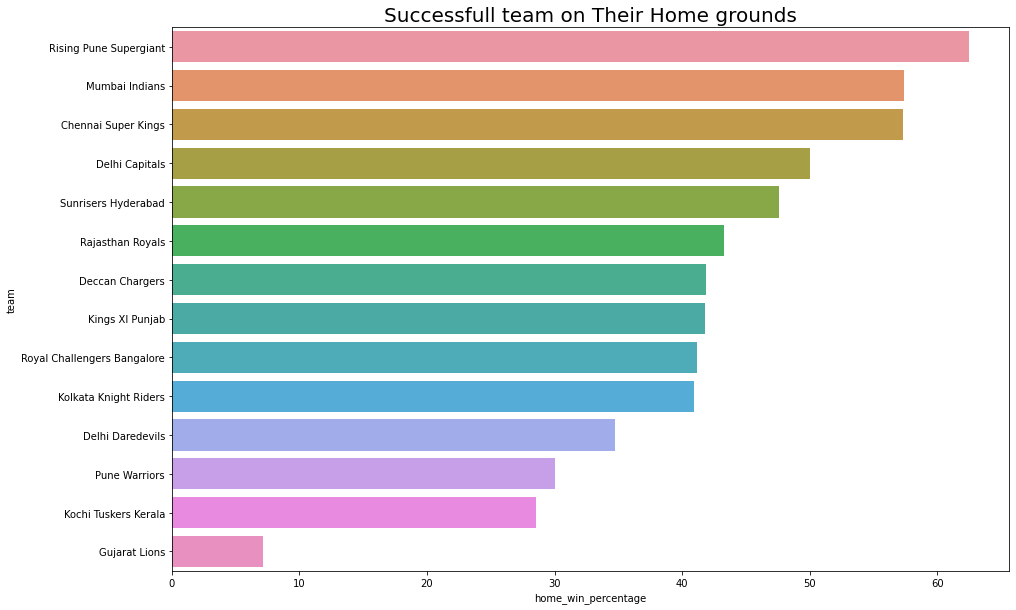

In [62]:
plt.figure(figsize=(15,10))
sns.barplot(y = team_home_df.team,x = team_home_df.home_win_percentage)
plt.title('Successfull team on Their Home grounds',fontdict={'fontsize':20})

### Teams that performed very well on away from Their home ground

Text(0.5, 1.0, 'Successfull teams')

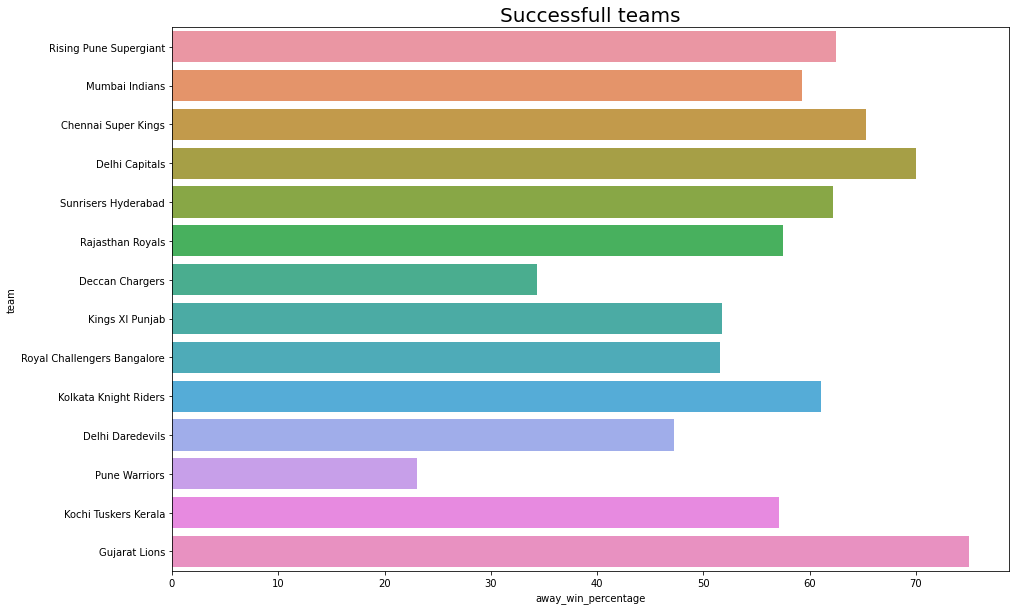

In [64]:
plt.figure(figsize=(15,10))
sns.barplot(y = team_home_df.team,x = team_home_df.away_win_percentage)
plt.title('Successfull teams',fontdict={'fontsize':20})

### Teams that performed overall very well.

Text(0.5, 1.0, 'Overall performance of teams')

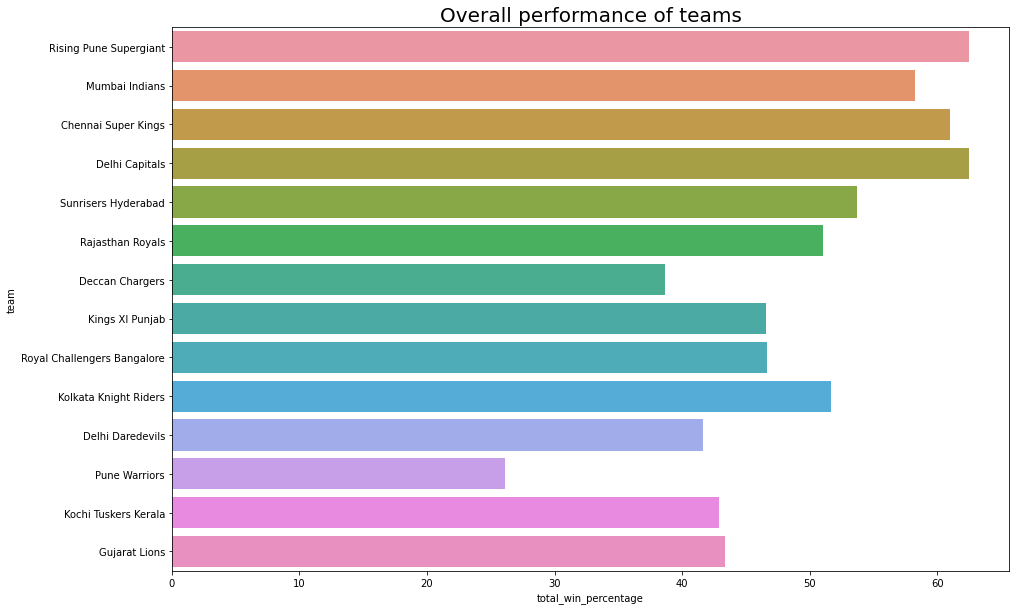

In [65]:
plt.figure(figsize=(15,10))
sns.barplot(y = team_home_df.team,x = team_home_df.total_win_percentage)
plt.title('Overall performance of teams',fontdict={'fontsize':20})